In [1]:
#import required packages
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housedata = pd.read_csv(r"C:\Users\MONISH\OneDrive\Desktop\Git_upload\Machine learning Projects\house Price\HousePrice_Dataset.csv")

In [3]:
housedata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housedata.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
IndepVar = []
for col in housedata.columns:
    if col != 'V4':
        IndepVar.append(col)

TargetVar = 'V4'

X = housedata[IndepVar]
y = housedata[TargetVar]

In [6]:
# split into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
# Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [8]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000438,0.00,0.414444,0.381743,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
1,0.150090,0.00,0.642963,0.630705,0.445679,0.945417,0.059335,1.000000,0.914122,0.808511,1.000000,0.403422,0.171111
2,0.038979,0.00,0.642963,0.682573,1.000000,0.823893,0.070483,1.000000,0.914122,0.808511,0.893212,0.098234,0.375556
3,0.109226,0.00,0.642963,0.728216,0.545124,0.971164,0.085069,1.000000,0.914122,0.808511,0.972414,0.490894,0.268889
4,0.003954,0.00,0.202222,0.244813,0.649550,0.881565,0.157508,0.304348,0.229008,0.510638,0.986888,0.220199,0.482222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.000816,0.00,0.447778,0.099585,0.519640,0.031926,0.283889,0.173913,0.402672,0.648936,0.995007,0.139349,0.424444
375,0.000215,0.55,0.112593,0.197095,0.600690,0.550978,0.418527,0.173913,0.349237,0.531915,1.000000,0.150386,0.420000
376,0.000539,0.00,0.122593,0.251037,0.527687,0.726056,0.198956,0.173913,0.208015,0.425532,0.996722,0.125828,0.435556
377,0.207844,0.00,0.642963,0.578838,0.110558,1.000000,0.000673,1.000000,0.914122,0.808511,1.000000,1.000000,0.195556


In [9]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.112057,0.000000,0.646628,0.674897,0.676456,0.992537,0.134532,1.000000,0.913958,0.9000,0.944723,0.460674,0.247664
1,0.003462,0.000000,0.296921,0.277778,0.389191,0.906183,0.144217,0.173913,0.374761,0.9875,0.985097,0.423533,0.285047
2,0.000773,0.000000,0.073314,0.211934,0.768263,0.821962,0.164749,0.086957,0.009560,0.6000,0.996478,0.174157,0.761682
3,0.139054,0.000000,0.646628,0.471193,0.378332,0.964819,0.104955,1.000000,0.913958,0.9000,0.954790,0.500936,0.172897
4,0.352690,0.000000,0.646628,0.604938,0.160908,0.883795,0.050140,1.000000,0.913958,0.9000,0.291523,0.769663,0.074766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.002750,0.131579,0.271628,0.286008,0.241609,1.000000,0.514925,0.173913,0.235182,0.2750,0.973006,0.872347,0.217290
123,0.055605,0.000000,0.700880,1.000000,0.201382,1.000000,0.025437,0.173913,0.411090,0.2125,1.000000,0.762797,0.196262
124,0.001084,0.221053,0.189883,0.111111,0.323544,0.421109,0.591708,0.130435,0.105163,0.4750,0.996478,0.357990,0.292056
125,0.000958,0.631579,0.045088,0.053498,0.475568,0.316631,1.000000,0.130435,0.426386,0.6625,0.931344,0.109551,0.394860


In [10]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
 K = K+1
 model = neighbors.KNeighborsRegressor(n_neighbors = K)
 model.fit(x_train, y_train) #fit the model
 y_pred=model.predict(x_test) #make prediction on test set
 error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
 rmse_val.append(error) #store rmse values
 print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.30738931174713596
RMSE value for k=  2 is: 0.28409269863430636
RMSE value for k=  3 is: 0.27589035061832895
RMSE value for k=  4 is: 0.2814822968937246
RMSE value for k=  5 is: 0.2833989425349383
RMSE value for k=  6 is: 0.26248359528792575
RMSE value for k=  7 is: 0.2601004762654139
RMSE value for k=  8 is: 0.25727600914560567
RMSE value for k=  9 is: 0.2555878864253398
RMSE value for k=  10 is: 0.2539452479893608
RMSE value for k=  11 is: 0.25624242604833936
RMSE value for k=  12 is: 0.25379878500909137
RMSE value for k=  13 is: 0.25126062447532804
RMSE value for k=  14 is: 0.25154192658957664
RMSE value for k=  15 is: 0.2504938254836321
RMSE value for k=  16 is: 0.24987693821553142
RMSE value for k=  17 is: 0.25147035122920447
RMSE value for k=  18 is: 0.25190052366227406
RMSE value for k=  19 is: 0.2511126460737673
RMSE value for k=  20 is: 0.2507861654625342


<AxesSubplot:>

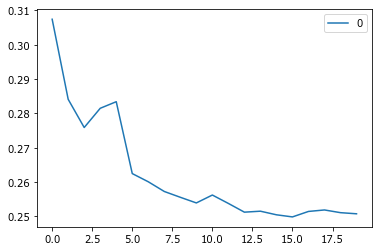

In [11]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [12]:
# Calculate the MAE, MSE, RMSE errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11692913385826773
Mean Squared Error: 0.06289370078740157
Root Mean Squared Error: 0.2507861654625342
